# Práctica de Support Vector Machine (SVM). Realizada por Daniel Tomé Gordo
## Máster en Data Science para Finanzas de CUNEF

In [1]:
url = 'https://www.kaggle.com/aceccon/6-iris-dataset-learning-to-tuning-parameters' # Esta es una propuesta de solución (medio de )

In [ ]:
url2 = 'https://www.kaggle.com/moghazy/classifying-the-iris-dataset-using-svms' # Esta es la más facil

El primer paso a realizar será importar todos los módulos que se vayan a usar a lo largo de la práctica.

In [134]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

Se descargan los datos del __*iris*__ y se dividen los datos en dos partes. La primera serán las variables predictoras, y la segunda la variable clasificadora.

In [3]:
iris = datasets.load_iris()
variables = iris.data
clasificador = iris.target

### Aproximación gráfica

Para realizar una primera aproximación a lo que el SVM realizará, se va representar gráficamente mediante un análisis de componentes principales. Esto es una técnica de reducción de las dimensiones (es decir de las variables). Se representará con dos dimensiones por simplicidad.

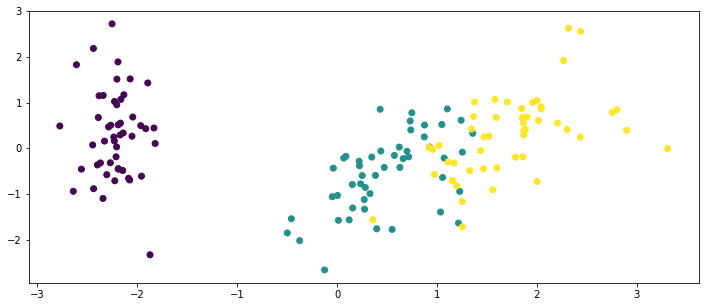

In [114]:
variables_escaladas = StandardScaler().fit_transform(variables)
PCA_2dim = PCA(n_components = 2).fit_transform(variables_escaladas)
figura2, ax2 = plt.subplots(figsize = (12,5))   
grafico_2dim = ax2.scatter(PCA_2dim[:,0], PCA_2dim[:,1], c = clasificador)  

Como se puede ver en el gráfico, usando dos dimensiones, se podría diferenciar de forma bastante meridiana 2 tipos distintos de grupos, tirando una línea en x=-1. Sin embargo, los dos grupos (representados por el color) que se sitúan a la derecha de dicho corte, no se podrían distinguir. De esta manera, se intentará representar con otra dimensión para ver, si a simple vista, se puede solucionar el problema.

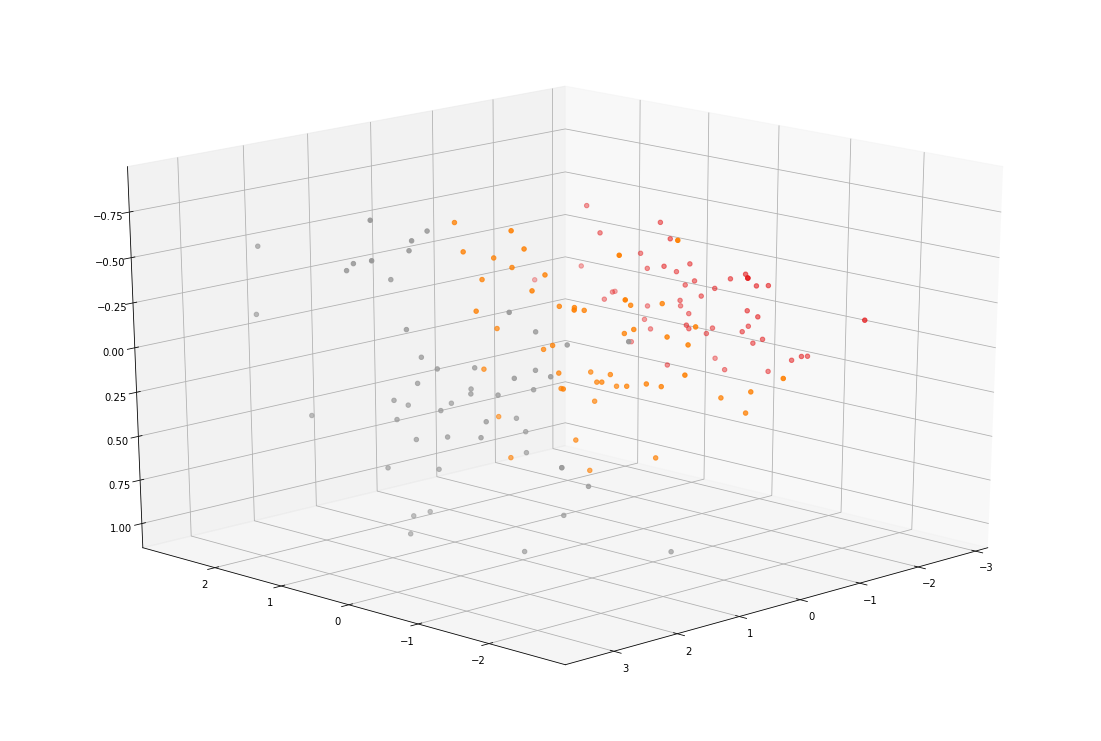

In [112]:
PCA_3dim = PCA(n_components = 3).fit_transform(variables_escaladas)
figura3 = plt.figure(figsize = (15,10)) # Con esto creamos el "lienzo" y establecemos el tamaño del gráfico en los ejes x e y
ax3 = Axes3D(figura3, elev=-160, azim=135) # Se crea la altura del eje z y el grado de visión
ax3.scatter(PCA_3dim[:,0], PCA_3dim[:,1], PCA_3dim[:,2], c = clasificador, cmap = plt.cm.Set1)

En este caso, con representando las 3 primeras componentes en el espacio de 3 dimensiones, se puede empezar a ver ligeramente la separación en función de los colores. No hay casi mezcla entre ellos

#### Separación en test y entrenamiento

Se crean las muestras con la siguiente función que divide con un 80-20 (entreno-test). El parámetro random_state es el que fija la aleatoriedad de la muestra (para que siempre sea la misma)

In [140]:
x_train, x_test, y_train, y_test = train_test_split(variables, clasificador, test_size = 0.2, random_state = 123)

### SVM

En primer lugar, se establecen los tipos de kernel, el rango de C y el rango de grado de libertad que serán usados para el uso del _Support Vector Machine_ (SVM)

In [125]:
tipos_kernel = ["linear", "poly", "rbf", "sigmoid"]     
rango_C = [0.01, 0.1, 1, 10, 100, 1000]                 
rango_gradoslibertad = [1, 2, 3, 4, 5, 6]                       

Se crea un diccionario con lo creado anteriormente para luego realizar la validación cruzada.

In [126]:
param_grid = {"kernel": tipos_kernel, "C": rango_C, "degree": rango_gradoslibertad} 

In [129]:
grid = GridSearchCV(estimator = svm.SVC(), 
                    param_grid = param_grid, 
                    cv = 5, 
                    scoring = 'accuracy', 
                    refit = True)   

La precisión del modelo alcanza el 97,5% (existen 3 errores en la clasificación), lo que es considerado como un gran indicador. En cuanto al tema de los parámetros a usar, han sido considerados como mejores los que aparecen en la salida

In [147]:
print("Precisión del modelo:", grid.best_score_*100, "%")
print(grid.best_params_)

Precisión del modelo: 97.5 %
{'C': 0.1, 'degree': 1, 'kernel': 'linear'}


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gridsearchcv', GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1...': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0))])